In [27]:
from numpy import loadtxt 
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [28]:
dataset = loadtxt('pima.csv', delimiter=",")

In [29]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [30]:
X = dataset[:,0:8] 
Y = dataset[:,8] 

In [31]:
seed = 9
test_size = 0.33 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
                                                    random_state=seed)

In [32]:
model = XGBClassifier() 
model.fit(X_train, y_train,eval_metric='error')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]

In [34]:
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.50%


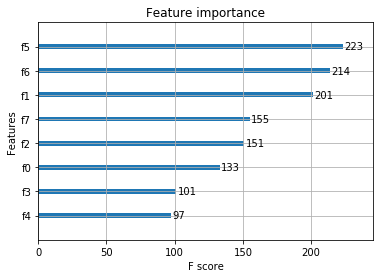

In [35]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model) 
pyplot.show()

In [36]:
# Import the libraries
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [37]:
# Load dataset from Sklearn
iris = datasets.load_iris()

In [38]:
# Define the x and y axes 
X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
# Segment data into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [40]:
# label encoded the target variable
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y) 
label_encoder = label_encoder.transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
# Create XGBoost Classifier
model = XGBClassifier() 
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:32:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
# Test model 
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]

In [43]:
# Print out model accuracy
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.00%


In [45]:
from numpy import loadtxt 
from xgboost import XGBClassifier 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import warnings

In [46]:
dataset = loadtxt('pima.csv', delimiter=",")

In [47]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [48]:
X = dataset[:,0:8] 
Y = dataset[:,8]

In [49]:
model = XGBClassifier() 

In [50]:
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [52]:
kfold = StratifiedKFold(n_splits=10, random_state=7,shuffle=True) 
results = cross_val_score(model, X, Y, cv=kfold)
print(results)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:24:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.7012987  0.7012987  0.79220779 0.75324675 0.72727273 0.72727273
 0.81818182 0.74025974 0.69736842 0.76315789]


In [53]:
import numpy as np
print('Accuracy:%.2f%%,  Std:%.2f%%'%(np.mean(results)*100,np.std(results)*100))

Accuracy:74.22%,  Std:3.83%


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [92]:
data = pd.read_csv("titanic.csv")

In [56]:
data = data[['Pclass', 'Sex', 'Age', 'Survived','Parch','SibSp']]

In [93]:
data = data[['Pclass', 'Age', 'Sex','Survived','SibSp']]

In [57]:
data.head(20)

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,male,22.0,0,0,1
1,1,female,38.0,1,0,1
2,3,female,26.0,1,0,0
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0
5,3,male,NaN,0,0,0
6,1,male,54.0,0,0,0
7,3,male,2.0,0,1,3
8,3,female,27.0,1,2,0
9,2,female,14.0,1,0,1


In [94]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [59]:
data.head(25)

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,0,22.0,0,0,1
1,1,1,38.0,1,0,1
2,3,1,26.0,1,0,0
3,1,1,35.0,1,0,1
4,3,0,35.0,0,0,0
5,3,0,NaN,0,0,0
6,1,0,54.0,0,0,0
7,3,0,2.0,0,1,3
8,3,1,27.0,1,2,0
9,2,1,14.0,1,0,1


In [95]:
# drop all missing values in all columns
data = data.dropna()

In [61]:
# Mean value imputation
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [96]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [87]:
model = XGBClassifier()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:12:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [89]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.36%


In [67]:
import pickle
pickle.dump(model, open("pima.pickle.dat", "wb")) 
print("Saved model to: pima.pickle.dat")

Saved model to: pima.pickle.dat


In [68]:
loaded_model = pickle.load(open("pima.pickle.dat", "rb")) 
print("Loaded model from: pima.pickle.dat")

Loaded model from: pima.pickle.dat


In [69]:
y_pred = loaded_model.predict(X_test) 
predictions = [round(value) for value in y_pred]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [70]:
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.80%


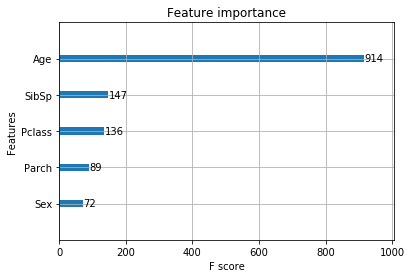

In [72]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(loaded_model) 
pyplot.show()

In [98]:
model = XGBClassifier() 
eval_set = [(X_test, y_test)] 
model.fit(X_train, y_train, eval_metric="error",early_stopping_rounds=10, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.16201
[1]	validation_0-error:0.15643
[2]	validation_0-error:0.13967
[3]	validation_0-error:0.13408
[4]	validation_0-error:0.13408
[5]	validation_0-error:0.13408
[6]	validation_0-error:0.12849
[7]	validation_0-error:0.12849
[8]	validation_0-error:0.12849
[9]	validation_0-error:0.12849
[10]	validation_0-error:0.13408
[11]	validation_0-error:0.13408
[12]	validation_0-error:0.13408
[13]	validation_0-error:0.13408
[14]	validation_0-error:0.13408
[15]	validation_0-error:0.13408
[16]	validation_0-error:0.13967


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [100]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.15%


In [101]:
from numpy import loadtxt 
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [102]:
dataset = loadtxt('pima.csv', delimiter=",")

In [103]:
X = dataset[:,0:8] 
Y = dataset[:,8]

In [104]:
seed = 9
test_size = 0.33 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
                                                    random_state=seed)

In [105]:
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set)

[0]	validation_0-error:0.14202	validation_0-logloss:0.54913	validation_1-error:0.33858	validation_1-logloss:0.62191
[1]	validation_0-error:0.11284	validation_0-logloss:0.45889	validation_1-error:0.33071	validation_1-logloss:0.58034
[2]	validation_0-error:0.09144	validation_0-logloss:0.39352	validation_1-error:0.30315	validation_1-logloss:0.56835
[3]	validation_0-error:0.07977	validation_0-logloss:0.35104	validation_1-error:0.29921	validation_1-logloss:0.56813
[4]	validation_0-error:0.06809	validation_0-logloss:0.30775	validation_1-error:0.32283	validation_1-logloss:0.56661
[5]	validation_0-error:0.06420	validation_0-logloss:0.27685	validation_1-error:0.31890	validation_1-logloss:0.57191
[6]	validation_0-error:0.05837	validation_0-logloss:0.25728	validation_1-error:0.31496	validation_1-logloss:0.57699
[7]	validation_0-error:0.04864	validation_0-logloss:0.23500	validation_1-error:0.30709	validation_1-logloss:0.58168
[8]	validation_0-error:0.04475	validation_0-logloss:0.22310	validation_1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-error:0.00195	validation_0-logloss:0.10225	validation_1-error:0.29921	validation_1-logloss:0.72810
[25]	validation_0-error:0.00000	validation_0-logloss:0.10001	validation_1-error:0.29134	validation_1-logloss:0.73316
[26]	validation_0-error:0.00195	validation_0-logloss:0.09780	validation_1-error:0.31102	validation_1-logloss:0.73526
[27]	validation_0-error:0.00000	validation_0-logloss:0.09540	validation_1-error:0.30315	validation_1-logloss:0.73896
[28]	validation_0-error:0.00000	validation_0-logloss:0.09343	validation_1-error:0.30315	validation_1-logloss:0.74000
[29]	validation_0-error:0.00000	validation_0-logloss:0.09026	validation_1-error:0.29528	validation_1-logloss:0.74296
[30]	validation_0-error:0.00000	validation_0-logloss:0.08616	validation_1-error:0.29921	validation_1-logloss:0.75279
[31]	validation_0-error:0.00000	validation_0-logloss:0.08444	validation_1-error:0.29921	validation_1-logloss:0.76099
[32]	validation_0-error:0.00000	validation_0-logloss:0.08144	val

[95]	validation_0-error:0.00000	validation_0-logloss:0.02619	validation_1-error:0.31496	validation_1-logloss:0.98919
[96]	validation_0-error:0.00000	validation_0-logloss:0.02598	validation_1-error:0.31102	validation_1-logloss:0.99272
[97]	validation_0-error:0.00000	validation_0-logloss:0.02574	validation_1-error:0.31496	validation_1-logloss:0.99689
[98]	validation_0-error:0.00000	validation_0-logloss:0.02556	validation_1-error:0.31102	validation_1-logloss:0.99381
[99]	validation_0-error:0.00000	validation_0-logloss:0.02533	validation_1-error:0.31496	validation_1-logloss:0.99333


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]

In [107]:
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.50%


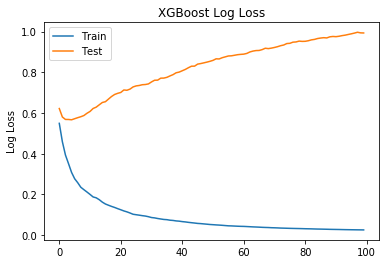

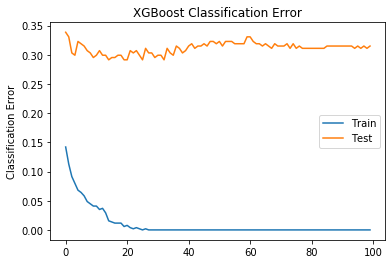

In [108]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [109]:
dataset = loadtxt('pima.txt', delimiter=",")

In [110]:
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [111]:
X = dataset[:,0:8] 
Y = dataset[:,8]

In [112]:
seed = 7 
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [113]:
model = XGBClassifier() 
model.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
eval_set = [(X_test, y_test)] 
model.fit(X_train, y_train, eval_metric="error",early_stopping_rounds=60, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.26623
[1]	validation_0-error:0.20779
[2]	validation_0-error:0.25325
[3]	validation_0-error:0.25325
[4]	validation_0-error:0.25325
[5]	validation_0-error:0.24675
[6]	validation_0-error:0.24675
[7]	validation_0-error:0.22727
[8]	validation_0-error:0.23377
[9]	validation_0-error:0.22727
[10]	validation_0-error:0.23377
[11]	validation_0-error:0.24675
[12]	validation_0-error:0.25974
[13]	validation_0-error:0.25974
[14]	validation_0-error:0.25325
[15]	validation_0-error:0.25325
[16]	validation_0-error:0.24026
[17]	validation_0-error:0.24675


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18]	validation_0-error:0.25325
[19]	validation_0-error:0.25325
[20]	validation_0-error:0.25325
[21]	validation_0-error:0.25974
[22]	validation_0-error:0.25974
[23]	validation_0-error:0.25325
[24]	validation_0-error:0.25974
[25]	validation_0-error:0.25325
[26]	validation_0-error:0.25974
[27]	validation_0-error:0.26623
[28]	validation_0-error:0.25325
[29]	validation_0-error:0.25974
[30]	validation_0-error:0.25974
[31]	validation_0-error:0.25974
[32]	validation_0-error:0.25325
[33]	validation_0-error:0.24675
[34]	validation_0-error:0.25325
[35]	validation_0-error:0.25974
[36]	validation_0-error:0.25974
[37]	validation_0-error:0.25974
[38]	validation_0-error:0.25974
[39]	validation_0-error:0.25974
[40]	validation_0-error:0.25974
[41]	validation_0-error:0.25974
[42]	validation_0-error:0.26623
[43]	validation_0-error:0.27273
[44]	validation_0-error:0.27273
[45]	validation_0-error:0.26623
[46]	validation_0-error:0.25974
[47]	validation_0-error:0.25974
[48]	validation_0-error:0.26623
[49]	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
eval_set = [(X, Y)] 
model.fit(X,Y, eval_metric="error",early_stopping_rounds=60, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.15625
[1]	validation_0-error:0.12630
[2]	validation_0-error:0.11328
[3]	validation_0-error:0.09505
[4]	validation_0-error:0.09375
[5]	validation_0-error:0.08854
[6]	validation_0-error:0.08203
[7]	validation_0-error:0.08073
[8]	validation_0-error:0.07682
[9]	validation_0-error:0.07031
[10]	validation_0-error:0.06510
[11]	validation_0-error:0.06510
[12]	validation_0-error:0.05339
[13]	validation_0-error:0.05339
[14]	validation_0-error:0.04818
[15]	validation_0-error:0.04688
[16]	validation_0-error:0.04167
[17]	validation_0-error:0.04036
[18]	validation_0-error:0.04036
[19]	validation_0-error:0.03906
[20]	validation_0-error:0.03906
[21]	validation_0-error:0.03125
[22]	validation_0-error:0.02734
[23]	validation_0-error:0.02734
[24]	validation_0-error:0.02083
[25]	validation_0-error:0.01562
[26]	validation_0-error:0.01432
[27]	validation_0-error:0.01562
[28]	validation_0-error:0.01432
[29]	validation_0-error:0.01172
[30]	validation_0-error:0.00911
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [117]:
y_pred = model.predict(X) 
predictions = [round(value) for value in y_pred] 

accuracy = accuracy_score(Y, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [119]:
from sklearn.datasets import load_boston
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

In [120]:
# Load dataset from SciKit-Learn
boston = load_boston()

# Create variable data to house data in a Pandas dataframe
data = pd.DataFrame(boston.data)

# Assign columns in dataframe to names in SciKit-Learns dataset
data.columns = boston.feature_names

# Assign the PRICE attribute as the target variable
data['PRICE'] = boston.target

#Assign the X and y varibles
X, y = data.iloc[:,:-1],data.iloc[:,-1]

# Create a variable called data_dmatrix to house our data and target variable 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [122]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear') 
xg_reg.fit(X_train,y_train) 
preds = xg_reg.predict(X_test)

[19:34:53] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [123]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.382535


In [124]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import time
from matplotlib import pyplot

In [125]:
data = read_csv('train.csv')
dataset = data.values

In [126]:
X = dataset[:,0:94]
y = dataset[:,94]

In [127]:
label_encoded_y = LabelEncoder().fit_transform(y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:46:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1 117.03548908233643
[19:48:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2 71.63650703430176
[19:49:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
3 63.267263889312744
[19:51:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGB

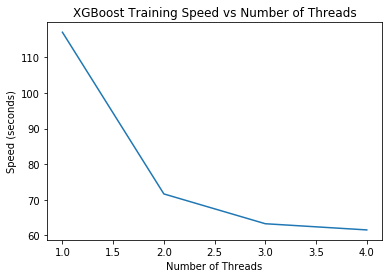

In [128]:
results = []
num_threads = [1, 2, 3, 4]
for n in num_threads:
	start = time.time()
	model = XGBClassifier(nthread=n)
	model.fit(X, label_encoded_y)
	elapsed = time.time() - start
	print(n, elapsed)
	results.append(elapsed)

pyplot.plot(num_threads, results)
pyplot.ylabel('Speed (seconds)')
pyplot.xlabel('Number of Threads')
pyplot.title('XGBoost Training Speed vs Number of Threads')
pyplot.show()

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [130]:
data = pd.read_csv("titanic.csv")

In [131]:
data = data[['Pclass', 'Sex', 'Age', 'Survived','Parch','SibSp']]

In [132]:
data.head(20)

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,male,22.0,0,0,1
1,1,female,38.0,1,0,1
2,3,female,26.0,1,0,0
3,1,female,35.0,1,0,1
4,3,male,35.0,0,0,0
5,3,male,NaN,0,0,0
6,1,male,54.0,0,0,0
7,3,male,2.0,0,1,3
8,3,female,27.0,1,2,0
9,2,female,14.0,1,0,1


In [133]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [134]:
data.head(25)

,Pclass,Sex,Age,Survived,Parch,SibSp
0,3,0,22.0,0,0,1
1,1,1,38.0,1,0,1
2,3,1,26.0,1,0,0
3,1,1,35.0,1,0,1
4,3,0,35.0,0,0,0
5,3,0,NaN,0,0,0
6,1,0,54.0,0,0,0
7,3,0,2.0,0,1,3
8,3,1,27.0,1,2,0
9,2,1,14.0,1,0,1


In [135]:
data = data.dropna()

In [136]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

SciKit-Learn Baseline Recommendations
n_esimators = 100
max_depth = 3
min_sample_split = 2
min_samples_leaf = 1
subsample = 1

XGBoost Baseline Recommendations
eta = 0.3 (a.k.a learning rate).
max_depth = 6
subsample = 1

In [138]:
model = XGBClassifier()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [140]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.80%


In [141]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [142]:
data = read_csv('train.csv')
dataset = data.values 

In [143]:
X = dataset[:,0:94]
y = dataset[:,94]

In [144]:
label_encoded_y = LabelEncoder().fit_transform(y)

In [145]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7) 
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)

KeyboardInterrupt: 

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [146]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

In [147]:
data = read_csv('train.csv')
dataset = data.values

In [148]:
X = dataset[:,0:94]
y = dataset[:,94]

In [149]:
label_encoded_y = LabelEncoder().fit_transform(y)

In [150]:
model = XGBClassifier()
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(subsample=subsample)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)

KeyboardInterrupt: 

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(subsample, means, yerr=stds)
pyplot.title("XGBoost subsample vs Log Loss")
pyplot.xlabel('subsample')
pyplot.ylabel('Log Loss')
pyplot.savefig('subsample.png')

In [151]:
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, label_encoded_y)

KeyboardInterrupt: 

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000832 using {'learning_rate': 0.3}
-2.155496 (0.000089) with: {'learning_rate': 0.0001}
-1.841059 (0.000739) with: {'learning_rate': 0.001}
-0.597215 (0.001007) with: {'learning_rate': 0.01}
-0.000926 (0.001211) with: {'learning_rate': 0.1}
-0.000835 (0.001185) with: {'learning_rate': 0.2}
-0.000832 (0.001178) with: {'learning_rate': 0.3}

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
In this notebook you'll work through the end to end machine learning pipeline and score in the top 1% of all participants in the Kaggle competition.
Kaggle is a site that hosts competitive modeling competitions. In the applied space, a score in the top 5% of this competition is considered a resume worthy bullet point.

In [152]:
# Import the libraries you'll need for this project
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

XGBoost is an open source machine learning library that belongs to a class of models called gradient boosters. XGBoost is a supervised machine learning algorithm. Supervised learning models use existing data to look for patterns. Two of the most common approaches used when building supervised learning models are classification and regression. XGBoost excels at building highly accurate classification and regression models very quickly. This means that XGBoost is a top choice for building real world models against highly structured datasets. XGBoost has also become the gold standard for competitive modeling.
XGBoost has won almost every competition using structured datasets on Kaggle and other competitive modeling competitions.

In [153]:
# Create a variable called data to hold the titanic dataset
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


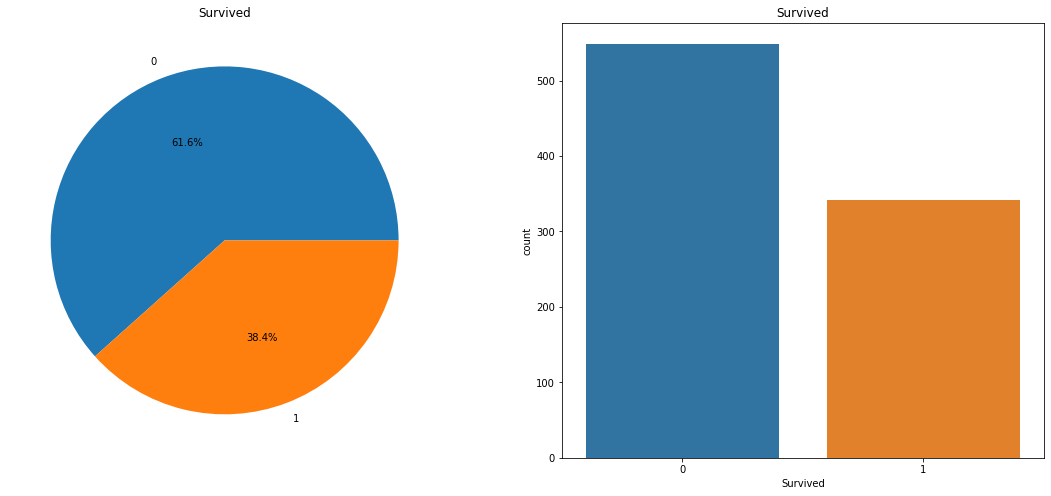

In [156]:
# import the libraries I need for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot survived vs dies
f,ax=plt.subplots(1,2,figsize=(19,8))
#data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Not many survived this tradgedy. Out of 891 passengers in training set, only around 350 survived.
Only 38.4% of the total training set survived the crash.
Let’s craft a graph to view the survivors based on their genders. Spoiler alert. The men didn’t too well.

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


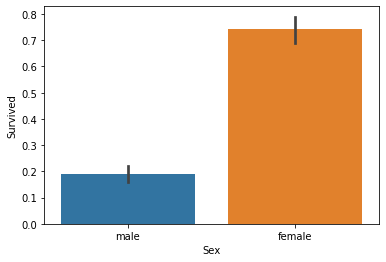

In [157]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=data)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [158]:
# Create a variable called data to hold only the attributes we want. 
data = data [['Survived', 'Pclass', 'Sex','Age','SibSp','Parch']]

In [159]:
# After I view the dataset the only non-numeric attribute is sex
data.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,NaN,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [160]:
# Use label encoding to covert sex to numbers
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Sex']= label_encoder.fit_transform(data['Sex'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [161]:
# Analyze how many null values are in the dataset
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In the code below I've chosen to drop all the NAN values instead of replacing them.
I did use mean value imputation, however, the model's performance was not as good as just dropping them.

In [162]:
# Dropping all the NANs in the age attribute
data.dropna(subset=['Age'], how='all', inplace = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [163]:
# Defining X and Y. 
X = data.drop('Survived', axis=1)
# The target variable is Survived. 
y = data['Survived']

In [164]:
# Separate the data into disparate training and testing splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [165]:
# Define the classifier. All models in SciKit-Learn are called classifiers. 
# I'm using the SciKit-Learn implementation of XGBoost on this project.
model = XGBClassifier(max_depth=4,n_estimators=50)
model.fit(X_train, y_train)

[16:21:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [166]:
# Let's create a variable to hold our prediction against test dataset and make predictions.
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [167]:
# Importing metrics and using accuracy as the metric for this project
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.36%
